In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [20]:
dataset_path = "/content/drive/MyDrive/datasets/5Animals"

idg = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,

    # data augmentation
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_data = idg.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size=(224, 224),
    # save_to_dir="/content/drive/MyDrive/datasets/animal_test"
)

validation_data = idg.flow_from_directory(
    dataset_path,
    shuffle=False,
    subset="validation",
    target_size=(224, 224)
)

Found 1194 images belonging to 5 classes.
Found 130 images belonging to 5 classes.


In [21]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(2, 2), activation="relu", padding="same", input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same"),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), strides=(1, 1), activation="relu"),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(512, activation="relu"),
    layers.Dense(5, activation="softmax"),
])

In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy']
              )

In [23]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=20)

Epoch 1/20
38/38 [==============================] - 36s 858ms/step - loss: 1.6920 - accuracy: 0.2839 - val_loss: 1.3945 - val_accuracy: 0.3769
Epoch 2/20
38/38 [==============================] - 32s 845ms/step - loss: 1.3340 - accuracy: 0.4188 - val_loss: 1.2640 - val_accuracy: 0.4769
Epoch 3/20
38/38 [==============================] - 32s 844ms/step - loss: 1.2028 - accuracy: 0.5126 - val_loss: 1.1192 - val_accuracy: 0.5538
Epoch 4/20
38/38 [==============================] - 34s 902ms/step - loss: 1.1044 - accuracy: 0.5410 - val_loss: 1.2003 - val_accuracy: 0.4846
Epoch 5/20
38/38 [==============================] - 31s 824ms/step - loss: 1.0115 - accuracy: 0.5938 - val_loss: 1.1233 - val_accuracy: 0.5077
Epoch 6/20
38/38 [==============================] - 31s 824ms/step - loss: 0.9615 - accuracy: 0.6106 - val_loss: 1.1636 - val_accuracy: 0.5154
Epoch 7/20
38/38 [==============================] - 31s 828ms/step - loss: 0.8881 - accuracy: 0.6424 - val_loss: 1.3396 - val_accuracy: 0.4462

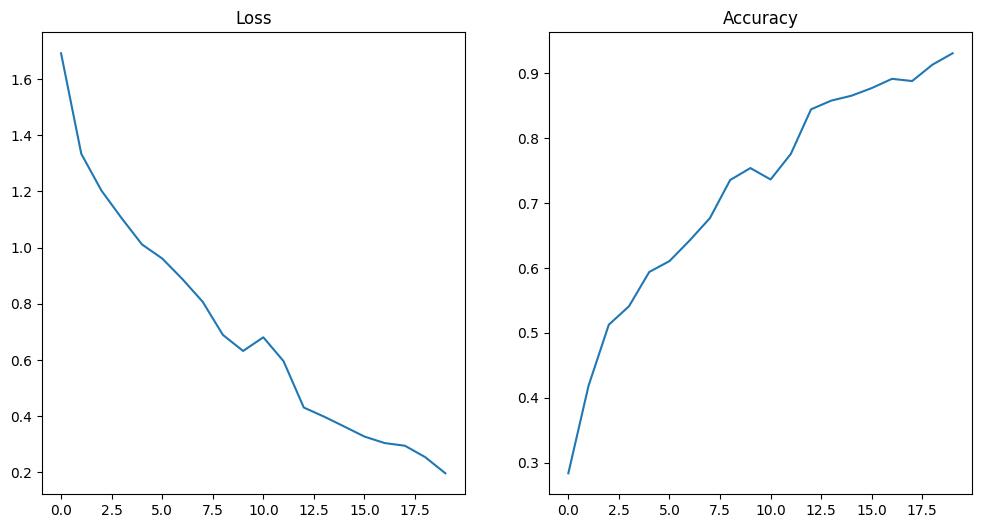

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(history.history['loss'])
ax1.set_title("Loss")
ax2.plot(history.history['accuracy'])
ax2.set_title("Accuracy")
plt.show()